# Credit Card Fraud Detection

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, roc_curve
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('fraud_data.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [4]:
data.shape

(21693, 30)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      21693 non-null  float64
 1   V2      21693 non-null  float64
 2   V3      21693 non-null  float64
 3   V4      21693 non-null  float64
 4   V5      21693 non-null  float64
 5   V6      21693 non-null  float64
 6   V7      21693 non-null  float64
 7   V8      21693 non-null  float64
 8   V9      21693 non-null  float64
 9   V10     21693 non-null  float64
 10  V11     21693 non-null  float64
 11  V12     21693 non-null  float64
 12  V13     21693 non-null  float64
 13  V14     21693 non-null  float64
 14  V15     21693 non-null  float64
 15  V16     21693 non-null  float64
 16  V17     21693 non-null  float64
 17  V18     21693 non-null  float64
 18  V19     21693 non-null  float64
 19  V20     21693 non-null  float64
 20  V21     21693 non-null  float64
 21  V22     21693 non-null  float64
 22

In [6]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.duplicated().sum()

143

In [8]:
duplicates = data.duplicated()
duplicate_index = data[duplicates].index
print("Indicated Duplicated Rows :", duplicate_index)

Indicated Duplicated Rows : Index([ 1139,  1556,  2171,  2190,  2387,  2408,  2433,  2924,  2963,  3286,
       ...
       21022, 21067, 21091, 21131, 21421, 21470, 21482, 21525, 21534, 21667],
      dtype='int64', length=143)


In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(21550, 30)

## Exploration Data Analysis (EDA)

In [11]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,...,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000
mean,-0.036547,0.044165,-0.079662,0.056684,-0.037196,-0.030833,-0.066622,0.006927,-0.044095,-0.086981,...,0.008076,0.006185,-0.002914,-0.004624,-0.002034,0.002203,0.001546,0.003097,87.203073,0.016056
std,2.092170,1.681791,1.850424,1.538158,1.521778,1.330158,1.562575,1.318763,1.156803,1.340121,...,0.765257,0.731507,0.627641,0.599227,0.521377,0.478544,0.421338,0.302505,236.275842,0.125693
min,-41.928738,-40.803981,-31.103685,-4.848504,-32.092129,-20.367836,-41.506796,-38.987263,-13.434066,-24.403185,...,-21.453736,-8.887017,-21.303666,-2.766638,-4.541819,-1.855355,-7.764147,-6.520075,0.000000,0.000000
25%,-0.933010,-0.595375,-0.948050,-0.852481,-0.700147,-0.778907,-0.565478,-0.206237,-0.671871,-0.554469,...,-0.224731,-0.536275,-0.163327,-0.357457,-0.319252,-0.326738,-0.070242,-0.053309,5.490000,0.000000
50%,-0.007161,0.076209,0.182884,-0.013552,-0.066487,-0.282499,0.032245,0.022768,-0.074955,-0.099292,...,-0.023630,0.008826,-0.012758,0.035418,0.009352,-0.044950,0.002460,0.011821,22.040000,0.000000
75%,1.311966,0.821641,1.025099,0.773996,0.608484,0.374724,0.566569,0.323863,0.590787,0.447786,...,0.192953,0.530912,0.146525,0.429736,0.352028,0.239126,0.096396,0.082130,77.187500,0.000000
max,2.451888,21.467203,4.069865,12.114672,29.162172,21.393069,34.303177,20.007208,9.125535,12.701538,...,27.202839,8.361985,15.626067,4.014444,5.541598,3.463246,9.879903,9.876371,7712.430000,1.000000


Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

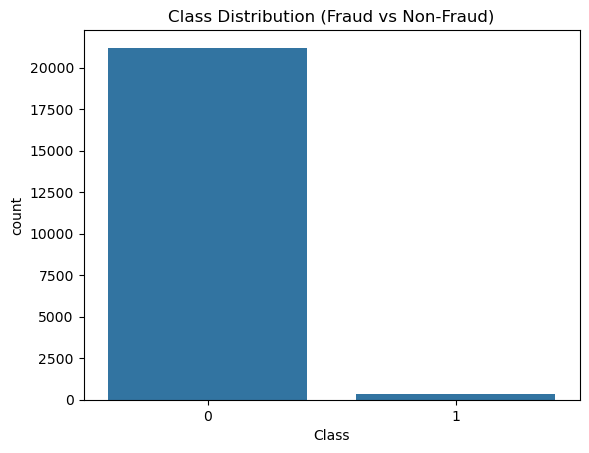

In [12]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

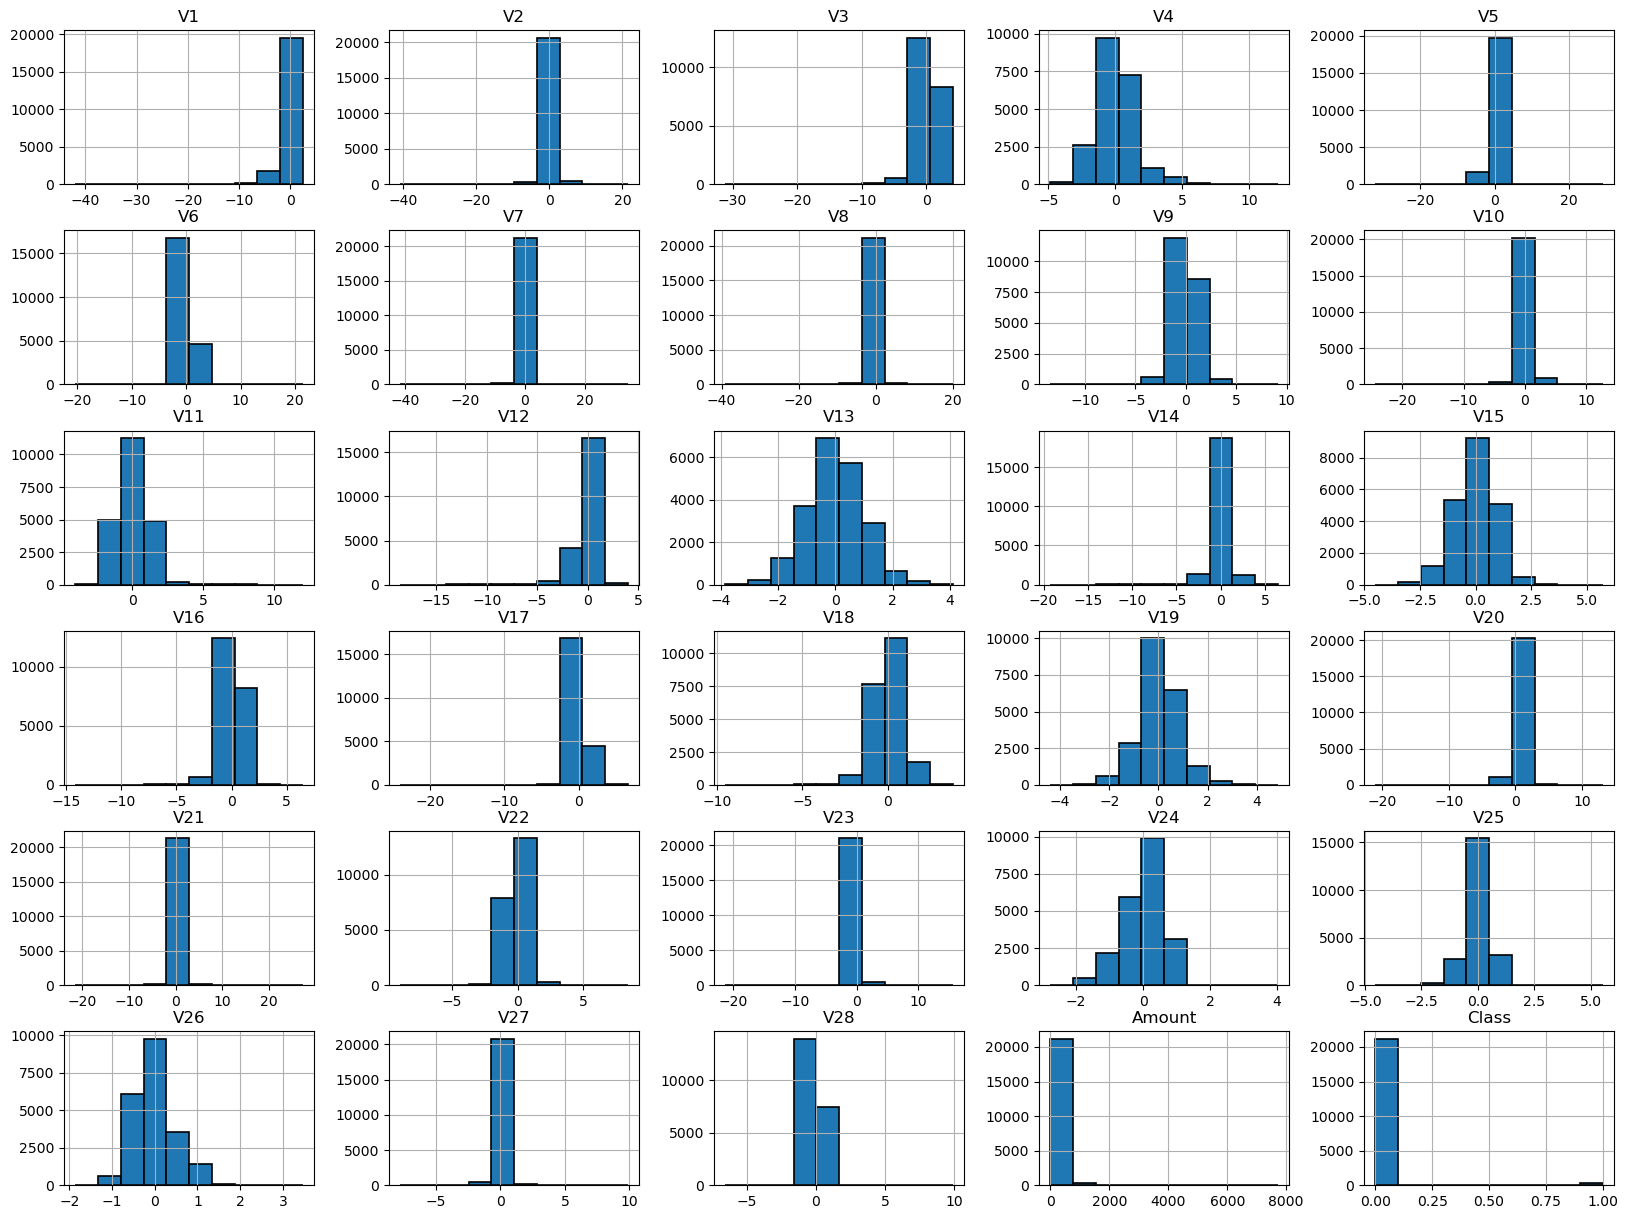

In [13]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)

Text(0.5, 1.0, 'Amount Distributions: Fraud vs Non-Fraud')

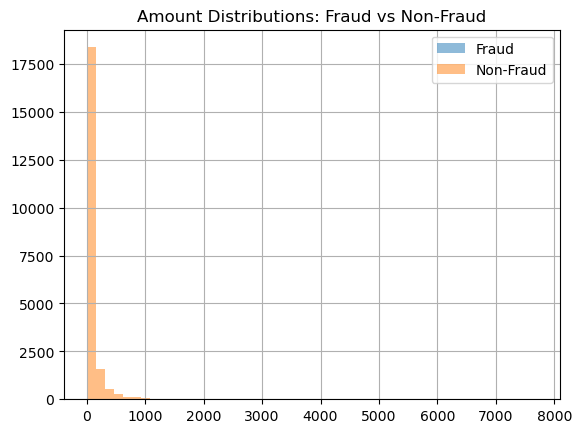

In [14]:
fraud =data[data['Class'] == 1]
non_fraud =data[data['Class'] == 0]

fraud['Amount'].hist(alpha=0.5, label='Fraud', bins=50)
non_fraud['Amount'].hist(alpha=0.5, label='Non-Fraud', bins=50)
plt.legend()
plt.title('Amount Distributions: Fraud vs Non-Fraud')

Text(0.5, 1.0, 'Correlation Matrix of Features')

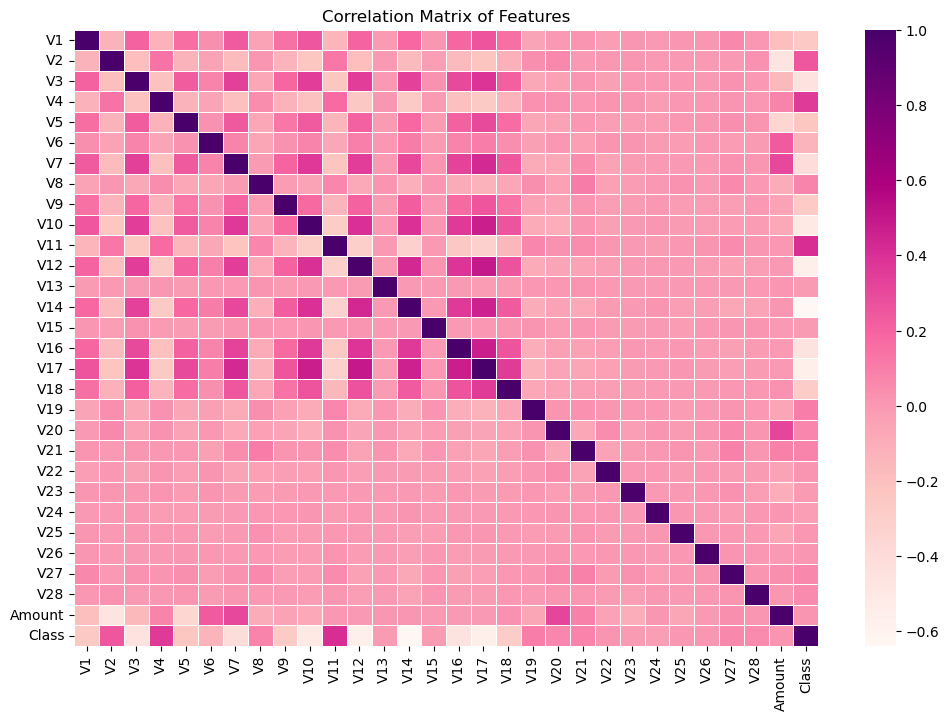

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='RdPu', linewidths=0.5)
plt.title("Correlation Matrix of Features")

## Data Transformation

In [16]:
features_to_scale=['Amount']
data['Amount'] = np.log(data['Amount'] + 1)

In [17]:
data.shape

(21550, 30)

In [18]:
features = ['V10','V11', 'V12', 'V14', 'V15','V16','V17']
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [19]:
data.shape

(21550, 30)

## Feature Engineering

Text(0, 0.5, 'Features')

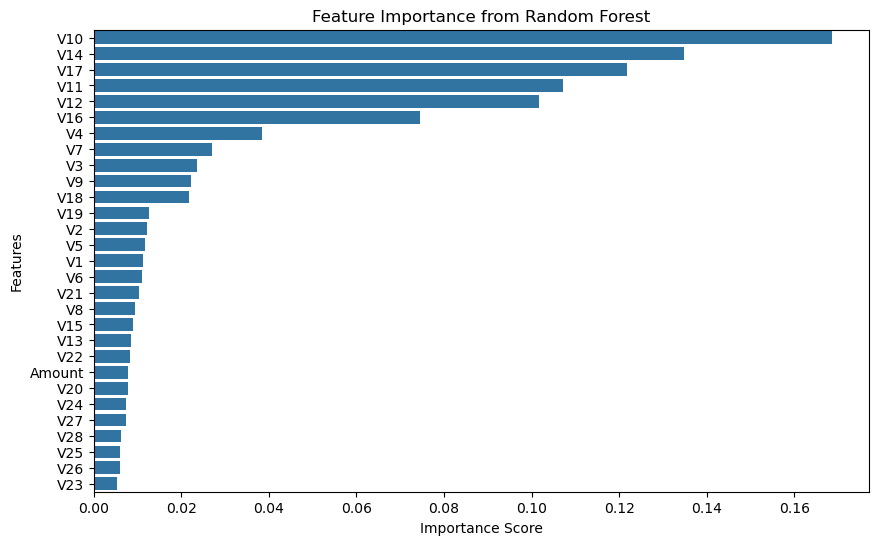

In [20]:
X = data.drop('Class', axis=1) 
y = data['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Get feature importance
importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')

## Handling Imbalanced Data

In [21]:
print(data[data['Class'] == 0]['Class'].value_counts())
print(data[data['Class'] == 1]['Class'].value_counts())

Class
0    21204
Name: count, dtype: int64
Class
1    346
Name: count, dtype: int64


In [22]:
X = data.drop('Class', axis=1)  
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(sampling_strategy=0.6, random_state=42)

In [23]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_resampled))

Before resampling: Counter({0: 14842, 1: 243})
After resampling: Counter({0: 14842, 1: 8905})


In [24]:
data = pd.DataFrame(X_resampled, columns=X.columns) 

#Combine the resampled X and y into a new DataFrame
data['Class'] = y_resampled 

In [25]:
data.shape #The original shape was (21550,30)

(23747, 30)

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

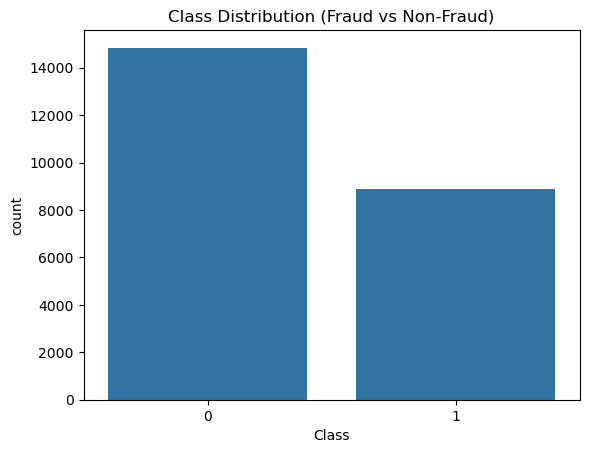

In [26]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

In [27]:
print(data.duplicated().sum()) #note that No null values will not appear in the newly generated rows

0


In [28]:
print(data[data['Class'] == 0]['Class'].value_counts())
print(data[data['Class'] == 1]['Class'].value_counts())

Class
0    14842
Name: count, dtype: int64
Class
1    8905
Name: count, dtype: int64


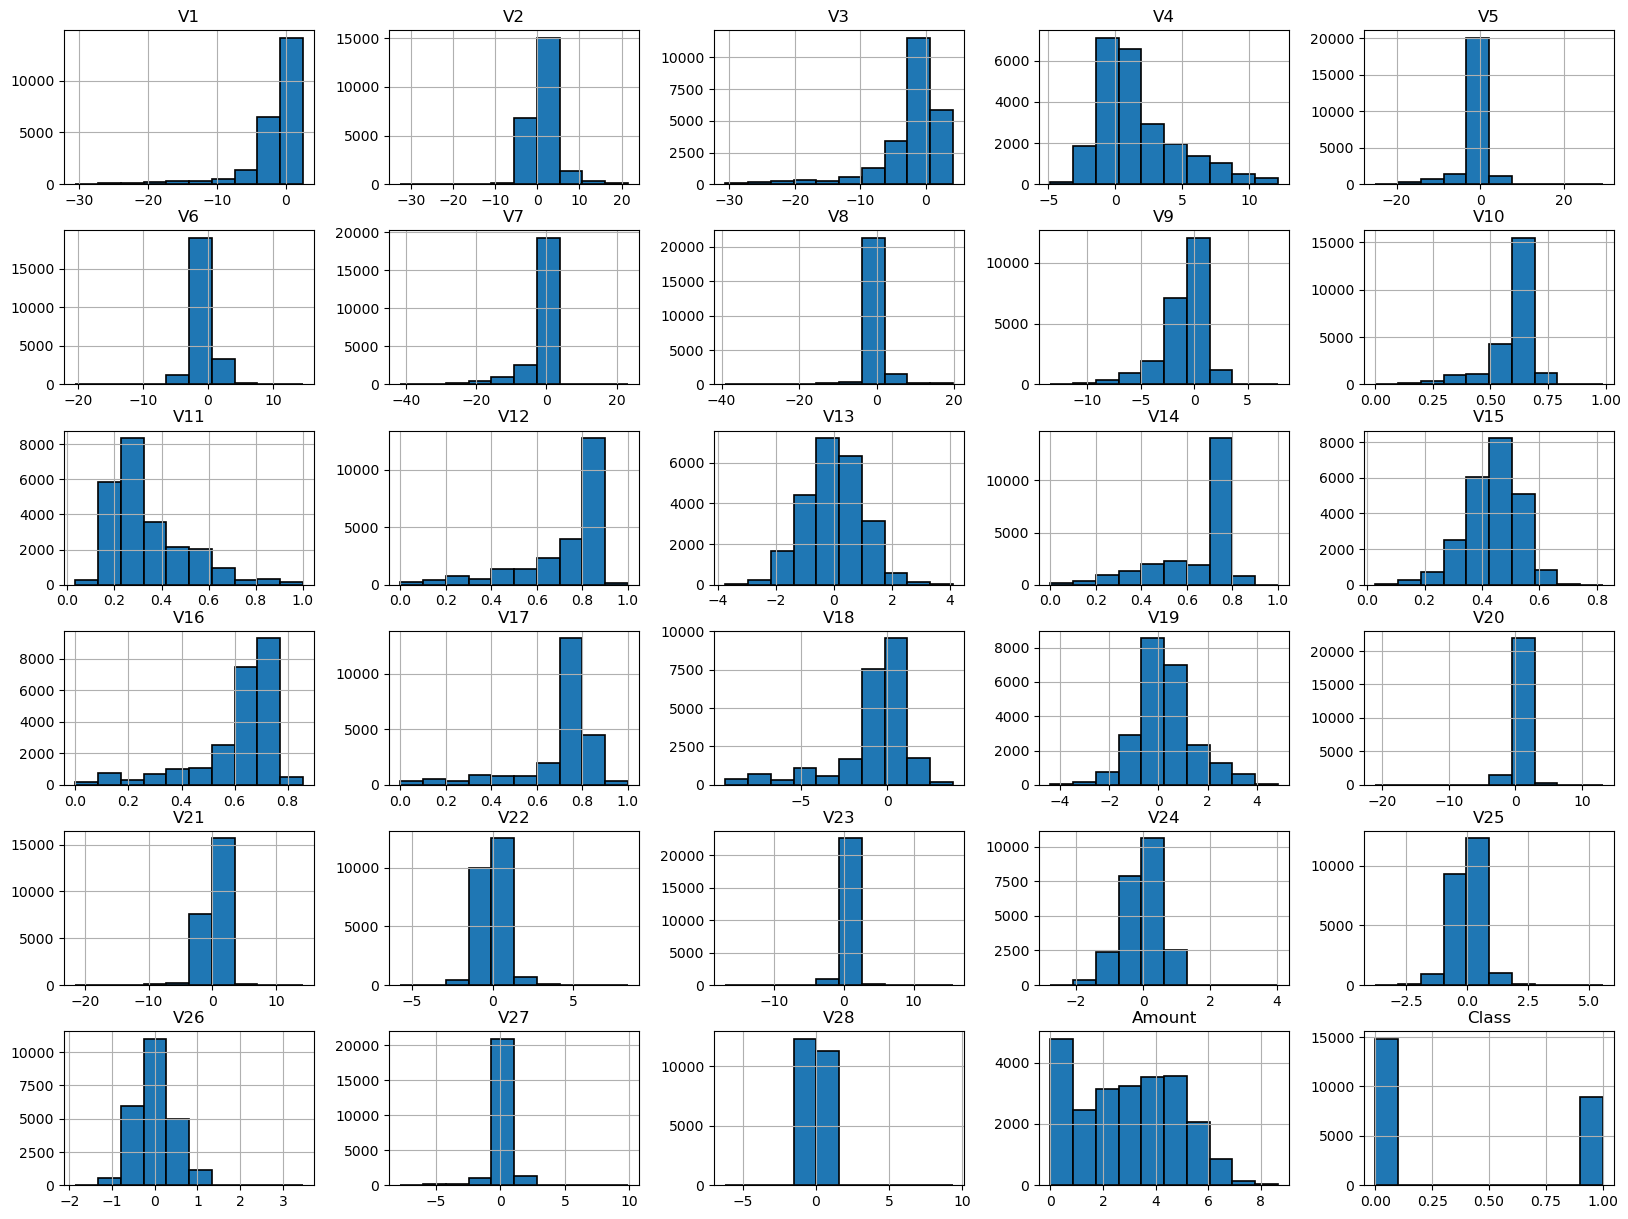

In [29]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)

## Splitting Data

In [30]:
X = data.drop('Class', axis=1)  
y = data['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Selection

In [31]:
classifiers = {
    "LogisticRegression": LogisticRegression(
        penalty='l2',           # L2 regularization to prevent overfitting
        C=2.0,                  # Regularization strength (lower value = stronger regularization)
        solver='liblinear',    
        max_iter=1000           
    ),
    
    "KNearest": KNeighborsClassifier(
         n_neighbors=10,                    
    ),
    
    "XGB Classifier": XGBClassifier(
        max_depth=3,            # Limits the depth of the tree to reduce overfitting
        learning_rate=1,     
        n_estimators=9,      
        subsample=0.8,         
        colsample_bytree=0.8,   
        reg_lambda=1,           # L2 regularization term to prevent overfitting
        reg_alpha=0.2           # L1 regularization term
    ),
    
    "DecisionTreeClassifier": DecisionTreeClassifier(
        max_depth=150,            # Limit depth of the tree to prevent overfitting
        min_samples_split=25,  
        min_samples_leaf=15,     
        max_features='sqrt',   
        ccp_alpha=0.01          
    )
}

## Model Training

In [32]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Training data performance
    print(f"Training Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_train, y_train_pred, pos_label=1):.4f}\n")
    
    # Testing data performance
    print(f"Testing Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred, pos_label=1):.4f}\n")

Training Results for LogisticRegression:
Accuracy: 0.9434
Precision: 0.9702
Recall: 0.8747
F1 Score: 0.9200

Testing Results for LogisticRegression:
Accuracy: 0.9433
Precision: 0.9715
Recall: 0.8773
F1 Score: 0.9220

Training Results for KNearest:
Accuracy: 0.9872
Precision: 0.9680
Recall: 0.9987
F1 Score: 0.9831

Testing Results for KNearest:
Accuracy: 0.9858
Precision: 0.9659
Recall: 0.9982
F1 Score: 0.9817

Training Results for XGB Classifier:
Accuracy: 0.9738
Precision: 0.9722
Recall: 0.9568
F1 Score: 0.9645

Testing Results for XGB Classifier:
Accuracy: 0.9674
Precision: 0.9649
Recall: 0.9493
F1 Score: 0.9570

Training Results for DecisionTreeClassifier:
Accuracy: 0.9137
Precision: 0.9863
Recall: 0.7789
F1 Score: 0.8704

Testing Results for DecisionTreeClassifier:
Accuracy: 0.9091
Precision: 0.9846
Recall: 0.7740
F1 Score: 0.8667



## Hyperparameter Tuning

In [33]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for DecisionTreeClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for DecisionTreeClassifier: {grid_search.best_score_:.4f}")

Best parameters for DecisionTreeClassifier: {'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score for DecisionTreeClassifier: 0.9706


In [34]:
param_grid = {
   'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear'],
        'max_iter': [100, 200]
}
clf = LogisticRegression()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for LogisticRegressionClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for LogisticRegressionClassifier: {grid_search.best_score_:.4f}")

Best parameters for LogisticRegressionClassifier: {'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score for LogisticRegressionClassifier: 0.9235


In [59]:
param_grid = {
   'n_neighbors': [3, 5, 7, 9, 11]
}
clf =KNeighborsClassifier()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for KNeighborsClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for KNeighborsClassifier: {grid_search.best_score_:.4f}")

Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
Best cross-validation score for KNeighborsClassifier: 0.9856


In [36]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [1, 2, 3],
    'subsample': [0.8, 1.6, 2.4]
}

# Create the GridSearchCV object
clf =XGBClassifier()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print(f"Best parameters for XGBClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for XGBClassifier: {grid_search.best_score_:.4f}")

Best parameters for XGBClassifier: {'learning_rate': 1, 'max_depth': 3, 'subsample': 0.8}
Best cross-validation score for XGBClassifier: 0.9948


## Model Evaluation

Model Evaluation Metrics on Test Data:
Accuracy: 0.9674
Precision: 0.9649
Recall: 0.9493
F1 Score: 0.9570
Confusion Matrix:
 [[4310   94]
 [ 138 2583]]


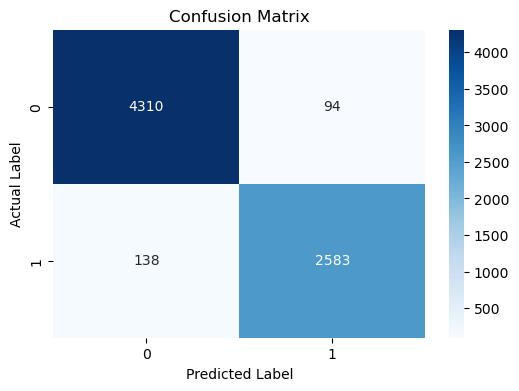

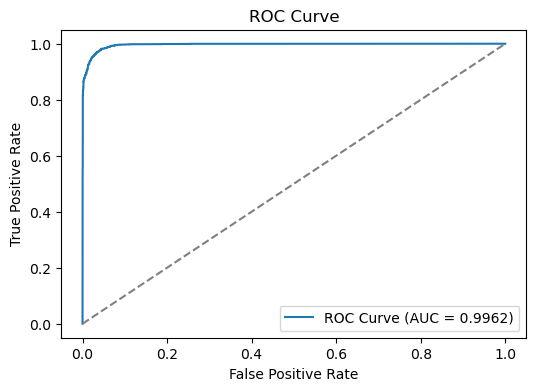

In [43]:
# Predictions using the best model
y_pred = classifiers['XGB Classifier'].predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation Metrics on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC-AUC Curve
y_test_proba = classifiers['XGB Classifier'].predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()

## Finalize

In [44]:
import pickle
with open('Final_Credit_Card_Fraud_Detection_Model.pkl', 'wb') as file:
    pickle.dump(classifiers['XGB Classifier'], file)

In [45]:
with open('Final_Credit_Card_Fraud_Detection_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)